# HW3: Regression and Classification

In this assignment you will preprocess the dataset and perform some basic regression and classification tasks. The learning outcome of this part is to know how one can pre-process a real-world dataset and perform a supervised learning task, and to understand some of the fundamental mechanisms behind these tasks.

### Student information
Please provide your information for automatic grading.

In [1]:
STUD_SUID = 'aabb0000'
STUD_NAME = 'Aaaa Bbbb'
STUD_EMAIL = 'aaaa.bbbb@dsv.su.se'

##  Grading: 

Pass/Fail.

To Pass this HW you need to provide a complete and correct solution, where one minor mistake is allowed. However, if your solution has more minor mistakes or lacks parts entirely or has one or more major mistakes, then you receive a Fail grade.

## OUTLINE: 

Data pre-processing, regression task and classification task

1. Reading the files
2. Missing Values
3. Imputing categorical variables
4. Imputing numerical variables
5. Classification with Decision Tree, single split
6. Classification with Decision Tree, Cross validation
7. Interpretation of the results

## Important instructions:

Each function you make will be considered during the grading, so it is important to strictly follow input and output instructions stated in the skeleton code.

You must not delete any of the given cells or change the structure of the cells or change the instructions in the cells or add cells (unless completely necessary, add a comment on why you added a cell) as they will help in grading the assignment. Should you contravene this provision, you will fail the assignment, and no feedback will be given on the part after the contravention.

Some variable names are already given and have random values or empty arrays assigned on them. In this case you should only change the assignments on the variables but keep the names as given.

When you are finished with implementing all the tasks, **clear all outputs, run all cells again** (make sure there is no error) and submit!

Make sure that the results and figures asked are visible for us to grade.

Make sure not to modify the files in the "data" folder in your submission, and not to change the folder structure or the files location, or your submission will not obtain a passing grade.

To ensure consistent results, make sure that every operation in which you can use a random seed has it set to 8. If your process is correct, but the results are wrong due to the seed being wrong, it will be considered a major mistake.

In [4]:
# these are the libraries that you will need throughout the assignment
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

from matplotlib.colors import ListedColormap


RSEED = 8

## *1.* Reading the files

### `Task: Read the datasets using pandas. Use the files called cleveland.data and switzerland.data that you have downloaded in this archive.`

The datasets contain information about adult patients from the US and from Switzerland. You can find more information in the heart-disease.names file in the 'data' folder.

In [29]:
# From the folder 'data', read the files cleveland.data and switzerland.data into the dataframes cleveland and test, respectively.
# Make sure to add the names of the variables to both dataframes.
 
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] # you can find the column names in the file 'data/heart-disease.names'.
# Select the correct column names for the dataset, as described in the file.
print(columns)

cleveland1 = pd.read_csv("../data/cleveland.data", names=columns )
cleveland = pd.DataFrame(cleveland1)  
# print(cleveland)
test1 = pd.read_csv("../data/switzerland.data", names=columns)
test = pd.DataFrame(test1)       
print(test)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
       age  sex   cp  trestbps  chol  fbs restecg  thalach  exang  oldpeak  \
0     32.0  1.0  1.0      95.0   0.0    ?       0    127.0    0.0      0.7   
1     34.0  1.0  4.0     115.0   0.0    ?       ?    154.0    0.0      0.2   
2     36.0  1.0  4.0     110.0   0.0    ?       0    125.0    1.0      1.0   
3     38.0  0.0  4.0     105.0   0.0    ?       0    166.0    0.0      2.8   
4     38.0  0.0  4.0     110.0   0.0    0       0    156.0    0.0      0.0   
..     ...  ...  ...       ...   ...  ...     ...      ...    ...      ...   
117    0.0  NaN  NaN       NaN   NaN  NaN     NaN      NaN    NaN      NaN   
118    0.0  NaN  NaN       NaN   NaN  NaN     NaN      NaN    NaN      NaN   
119  999.0  NaN  NaN       NaN   NaN  NaN     NaN      NaN    NaN      NaN   
120  999.0  NaN  NaN       NaN   NaN  NaN     NaN      NaN    NaN      NaN   
121  999.0  NaN  NaN  

In [22]:
# do not delete this!
cleveland.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [23]:
# do not delete this!
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32.0,1.0,1.0,95.0,0.0,?,0,127.0,0.0,0.7,1,?,?,1.0
1,34.0,1.0,4.0,115.0,0.0,?,?,154.0,0.0,0.2,1,?,?,1.0
2,36.0,1.0,4.0,110.0,0.0,?,0,125.0,1.0,1.0,2,?,6,1.0
3,38.0,0.0,4.0,105.0,0.0,?,0,166.0,0.0,2.8,1,?,?,2.0
4,38.0,0.0,4.0,110.0,0.0,0,0,156.0,0.0,0.0,2,?,3,1.0


In [24]:
# if you want to see information about the dataset, uncomment:
cleveland.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,60.270627,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,77.296578,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,0.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,999.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [25]:
# if you want to see information about the dataset, uncomment:
test.describe()

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,num
count,122.000000,117.000000,117.000000,117.000000,117.0,117.000000,117.000000,117.000000,117.000000
mean,82.409836,0.914530,3.683761,129.957265,0.0,122.299145,0.435897,0.653846,1.769231
std,170.211621,0.280782,0.702822,22.423200,0.0,25.759921,0.498007,1.056061,1.011866
min,0.000000,0.000000,1.000000,80.000000,0.0,60.000000,0.000000,-2.600000,0.000000
25%,48.500000,1.000000,4.000000,115.000000,0.0,105.000000,0.000000,0.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,121.000000,0.000000,0.300000,2.000000
75%,61.000000,1.000000,4.000000,145.000000,0.0,141.000000,1.000000,1.500000,3.000000
max,999.000000,1.000000,4.000000,200.000000,0.0,182.000000,1.000000,3.700000,4.000000


## *2.* Missing values

### `Task: Produce a plot with two subplots, each showing a bar plot of the 'missing' values (either encoded as NaN, or encoded with values that should not be in the dataset) for each feature for the two dataframes. The plot must have a name, and the bars must be named using the feature names.`

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 4 2 0]


C:\Users\muham\AppData\Local\Temp\ipykernel_19868\64351768.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(cleveland_missing.index, rotation=45, ha='right')
C:\Users\muham\AppData\Local\Temp\ipykernel_19868\64351768.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(test_missing.index, rotation=45, ha='right')


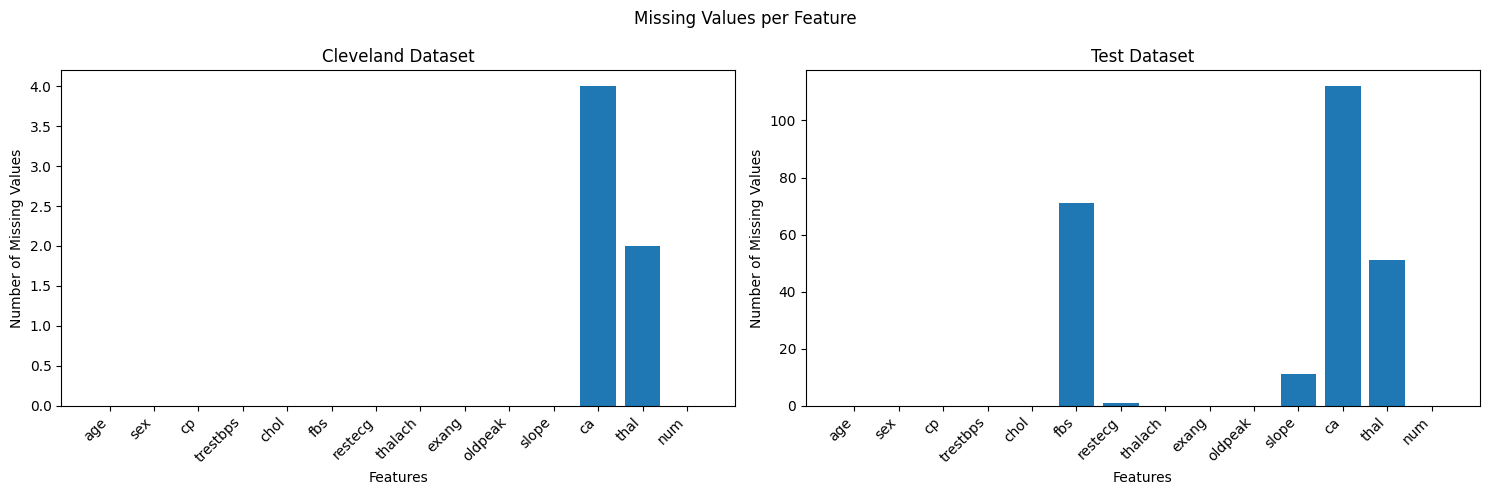

In [39]:
# Create 1 figure with a set of 2 subplots. Each axes should contain a figure as described below: 

# subplot 1: A barplot with the missing valies for each attribute in the dataset 'cleveland'
# subplot 2: A barplot with the missing valies for each attribute in the dataset 'test'



# cleveland_missing = cleveland.isnull().sum() 
# axes[0].bar(cleveland_missing.index, cleveland_missing.values)
# axes[0].set_title('Cleveland Dataset')
# axes[0].set_xlabel('Attributes')
# axes[0].set_ylabel('Number of Missing Values')
# axes[0].tick_params(axis='x', rotation=45)
# # Subplot 2: Test dataset
# test_missing = test.isnull().sum()
# axes[1].bar(test_missing.index, test_missing.values)
# axes[1].set_title('Test Dataset')
# axes[1].set_xlabel('Attributes')
# axes[1].set_ylabel('Number of Missing Values')
# axes[1].tick_params(axis='x', rotation=45)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Missing Values per Feature')

# Subplot 1: Cleveland dataset
cleveland_missing = (cleveland == '?').sum() # check missing values, which are "?"

axes[0].bar(cleveland_missing.index, cleveland_missing.values)
axes[0].set_title('Cleveland Dataset')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Number of Missing Values')
axes[0].set_xticklabels(cleveland_missing.index, rotation=45, ha='right')

# Subplot 2: Test dataset
test_missing = (test == '?').sum()
axes[1].bar(test_missing.index, test_missing.values)
axes[1].set_title('Test Dataset')
axes[1].set_xlabel('Features')
axes[1].set_ylabel('Number of Missing Values')
axes[1].set_xticklabels(test_missing.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## *3.* Imputing categorical variables

In the file 'data/heart-disease.names' you can find, together with the names of the columns, a description of their contents.

Determine which columns are categorical, and set their type to object.

Determine which columns are numerical, and set their type accordingly.

In [9]:
categorical_columns = []        # change this
numerical_columns_int = []      # change this
numerical_columns_float = []    # change this

### ` Task: Split the cleveland dataframe in a train and a validation set. `

The train set must be called train, the the validation set must be called val. The size of the validation set must be 30% of the total size of the cleveland dataframe. Use shuffle=True and stratify=True. Make sure that both train and val are dataframes, and that the columns have the correct names. Reset the indexes of all four the dataframes, using drop=True.

In [10]:
# Split the data into X and y, where X contains the features and y contains the target variable.
X_cleveland = pd.DataFrame()  # change this
y_cleveland = pd.DataFrame()  # change this

X_test = pd.DataFrame()       # change this
y_test = pd.DataFrame()       # change this

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
X_train.head(5)

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
X_val.head(5)

In [14]:
# To make the classification task easier, transform the target variable into a binary variable.
# If the target variable is 0, it should remain 0. If the target variable is different from 0, it should be transformed into 1.
y_train = pd.DataFrame()  # change this
y_val = pd.DataFrame()    # change this
y_test = pd.DataFrame()   # change this

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL

'''
train_set_from_franco = pd.read_csv('../../../testing_data/train.csv')
val_set_from_franco = pd.read_csv('../../../testing_data/val.csv')

assert train.equals(train_set_from_franco), 'train set is not correct'
assert val.equals(val_set_from_franco), 'validation set is not correct'
'''


### ` Task: impute the missing values in the categorical columns. Use a KNNImputer from sklearn for the imputation process. `

In [16]:
# 1. Create a subset of the train dataset with only the categorical columns. Call this subset train_cat.
# 2. Create a subset of the val dataset with only the categorical columns. Call this subset val_cat.
# 3. Create a subset of the test dataset with only the categorical columns. Call this subset test_cat
# 4. Impute the three datasets using a KNN imputer with k=5 and weights set to distance
# 5. Save the results in train_imputed_knn, val_imputed_knn, and test_imputed_knn.
# 6. Make sure to add the column names to the resulting dataframes. DO NOT SKIP THIS STEP.
# The new values might have new values that are not in the original dataset.
# Approximate them to the nearest value in the original dataset, for each column.
# To do so, you can store the original values of each column in a dictionary or a list.
# if a new value is equidistant from two original values, choose the largest one.
# (Example: if the original values are [1, 3] and the new value is 2, it will become 3)

from sklearn.impute import KNNImputer

# Write your code here

train_imputed_knn = pd.DataFrame()  # change this
val_imputed_knn = pd.DataFrame()    # change this
test_imputed_knn = pd.DataFrame()   # change this

In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_knn_franco = pd.read_csv('../../../testing_data/train_imp_knn.csv')
val_imp_knn_franco = pd.read_csv('../../../testing_data/val_imp_knn.csv')
test_imp_knn_franco = pd.read_csv('../../../testing_data/test_imp_knn.csv')

assert train_imputed_knn.equals(train_imp_knn_franco), 'train imputed knn is not correct'
assert val_imputed_knn.equals(val_imp_knn_franco), 'val imputed knn is not correct'
assert test_imputed_knn.equals(test_imp_knn_franco), 'test imputed knn is not correct'
'''

## *4.* Imputing numerical variables

### ` Task: impute the missing values in the numerical columns. Use a Lasso Regression from sklearn for the imputation process. `
If more than one column contains missing values, proceed in increasing order: the lowest number of missing values first, then the second lowest, then the third ...

Exclude the columns with missing values when fitting your regressor: only train on columns without missing values. After a column has been imputed, it can be used to fit the regressor in the next step.

In [18]:
# 1. Create a subset of the train dataset with only the numerical columns. Call this subset train_num.
# 2. Create a subset of the val dataset with only the numerical columns. Call this subset val_num.
# 3. Create a subset of the test dataset with only the numerical columns. Call this subset test_num.
# 4a. Create a subset of train_num containing the rows with missing values. Call this subset train_num_missing.
# 4b. Create a subset of train_num containing the rows without missing values. Call this subset train_num_not_missing.
# 5a. Create a subset of val_num containing the rows with missing values. Call this subset val_num_missing.
# 5b. Create a subset of val_num containing the rows without missing values. Call this subset val_num_not_missing.
# 6a. Create a subset of test_num containing the rows with missing values. Call this subset test_num_missing.
# 6b. Create a subset of test_num containing the rows without missing values. Call this subset test_num_not_missing.
# 7. Using a Lasso regression, impute the missing values in train_num_missing, val_num_missing, and test_num_missing.
# On what should the Lasso regression be trained?
# 8. Repeat steps 1-7 until all the missing values are imputed.
# 9. Save the results in train_num_imputed_lasso, val_num_imputed_lasso, and test_num_imputed_lasso.
# 10. Concatenate the imputed subsets with the subsets that did not contain missing values.
# 11. Save the resulting datasets in train_imputed_lasso, val_imputed_lasso, and test_imputed_lasso.
# IMPORTANT: The order of the rows should be the same as in the original datasets.

from sklearn.linear_model import Lasso

# Write your code here

train_imputed_lasso = pd.DataFrame()  # change this
val_imputed_lasso = pd.DataFrame()    # change this
test_imputed_lasso = pd.DataFrame()   # change this


In [ ]:
# DO NOT DELETE/CHANGE THIS CELL
'''
train_imp_lasso_franco = pd.read_csv('../../../testing_data/train_imp_lasso.csv')
val_imp_lasso_franco = pd.read_csv('../../../testing_data/val_imp_lasso.csv')
test_imp_lasso_franco = pd.read_csv('../../../testing_data/test_imp_lasso.csv')

assert train_imputed_lasso.equals(train_imp_lasso_franco), 'train imputed lasso is not correct'
assert val_imputed_lasso.equals(val_imp_lasso_franco), 'val imputed lasso is not correct'
assert test_imputed_lasso.equals(test_imp_lasso_franco), 'test imputed lasso is not correct'
'''

## *5.* Classification with Decision Tree, using a single split 

In [20]:
# Merge the train_imputed_knn and train_imputed_lasso datasets. Call the resulting dataset X_train_imputed.
# Merge the val_imputed_knn and val_imputed_lasso datasets. Call the resulting dataset X_val_imputed.
# Merge the test_imputed_knn and test_imputed_lasso datasets. Call the resulting dataset X_test_imputed.

# Write your code here

X_train_imputed = pd.DataFrame()  # change this
X_val_imputed = pd.DataFrame()    # change this
X_test_imputed = pd.DataFrame()   # change this


### ` Task: Train a set of Decision Trees, using different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Create a dictionary to contain the hyperparameters. The dictionary should contain the following:
# - criterion: 'gini' and 'entropy'
# - max_depth: 3, 5, and 7
# - min_samples_split: 2, 5, and 10
# 2. Create a dictionary called performance to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the hyperparameters from the dictionary.
# 4. Create a for loop to iterate over the combinations of hyperparameters.
# 5. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation set.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary.

from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import time

hyperparameters = {} # change this
# add missing steps here

start = time.time() # DO NOT CHANGE/DELETE THIS LINE

for number in range(1, 11): # change this
    # Add the missing steps here.
    pass # remove this line

end = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with a single split: ', end - start) # DO NOT CHANGE/DELETE THIS LINE

In [22]:
# select the best performing hyperparameters
best_hyperparameters = None # change this

best_hyperparameters

In [23]:
# Concatenate the train and validation datasets. Call the resulting datasets X and y.
X = pd.DataFrame()  # change this
y = pd.DataFrame()  # change this

# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.

# Write your code here

# Predict the target variable for the test dataset.

# Write your code here

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_single_split.

# Write your code here

f1_test_single_split = None # change this

In [24]:
f1_test_single_split # DO NOT DELETE/CHANGE THIS LINE

## *6.* Classification with Decision Tree using Cross Validation

### ` Task: Train a cross-validation object, then train a decision tree using cross-validation and different hyperparameters. Use the best performing Decision Tree to predict the class for the test set. `

In [ ]:
# 1. Use the same hyperparameters from the previous task.
# 2. Create a StratifiedKFold object with 5 splits, use shuffle=True.
# 3. Create a dictionary called performance_CV to store the hyperparameter combinations and the corresponding performance of the model.
# 3. Create a ParameterGrid object with the usual hyperparameters.
# 4. Create a for loop to iterate over the folds of the StratifiedKFold.
# 5. For each fold, create a for loop to iterate over the combinations of hyperparameters.
# 6. In each iteration
# - Create a DecisionTreeClassifier with the hyperparameters for that iteration.
# - Fit the model.
# - Predict the target variable for the validation fold.
# - Calculate the F1 score of the model.
# - Add the hyperparameters and the F1 score to the performance dictionary. Each hyperparameter combination may have multiple F1 scores.

from sklearn.model_selection import StratifiedKFold

X = [[5,6], [10,11], [15,16], [20,21], [25,26], [30,31], [35,36], [40,41], [45,46], [50,51]]    # Delete this line
y = [0,1,0,1,0,1,0,1,0,1]                                                                       # Delete this line

X = pd.DataFrame(X)                                                                             # Delete this line
y = pd.DataFrame(y)                                                                             # Delete this line


# DO NOT FORGET TO DELETE THE PREVIOUS LINES. They are only to make the empty assignment run without errors,
# but they will destroy the data you need.


CV = StratifiedKFold() # change this

hyperparameters = None # change this
# add missing steps here

start_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

for i, (train_index, val_index) in enumerate(CV.split(X, y)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    for number in range(1, 11): # change this
        # Add the missing steps here.
        pass # remove this line

end_CV = time.time() # DO NOT CHANGE/DELETE THIS LINE

print('Time elapsed to run the hyperparameter tuning with Cross Validation: ', end_CV - start_CV) # DO NOT CHANGE/DELETE THIS LINE


In [26]:
# select the best performing hyperparameters, which are the ones with the highest average F1 score
best_hyperparameters_CV = None # change this

best_hyperparameters_CV # DO NOT DELETE/CHANGE THIS LINE

In [27]:
# Create a DecisionTreeClassifier with the best hyperparameters.
# Fit the model on the X and y datasets.
# Call the fitted model final_tree.

# Write your code here

# Predict the target variable for the test dataset.

# Write your code here

# Calculate the F1 score of the model on the test dataset. Call the variable f1_test_CV.

# Write your code here

f1_test_CV = None # change this

In [28]:
f1_test_CV # DO NOT DELETE/CHANGE THIS LINE

## *7.* Interpretation of the results 

### ` Task: Look at the times elapsed to train the Decision Tree using the single split and the CV strategies. Is there a difference? Explain the difference or the lack of difference in 50 words or less. `

Write your explanation here. Delete this text.

### ` Task: Plot final_tree, and explain which feature or combination of features is the most relevant for that model, in 50 words or less. `

You can find instructions on how to plot a decision tree at [this link](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py).

In [29]:
# plot your tree here.

Write your explanation here. Delete this text.